In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [63]:
#Read the dataset and drop id column
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = data.drop(['id'], axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [64]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


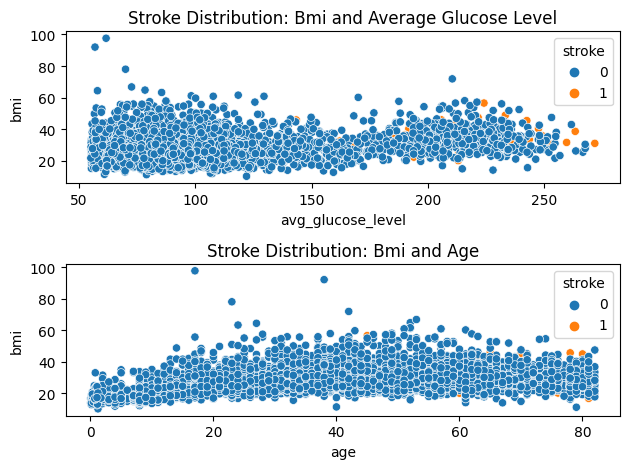

In [65]:
#Plot -> Stroke Distribution: Bmi and Average Glucose Level
plt.subplot(2,1,1)
plt.title('Stroke Distribution: Bmi and Average Glucose Level')
sns.scatterplot(x=data['avg_glucose_level'],y=data['bmi'],hue=data['stroke'])

#Plot -> Stroke Distribution: Bmi and Age
plt.subplot(2,1,2)
plt.title('Stroke Distribution: Bmi and Age')
sns.scatterplot(x=data['age'],y=data['bmi'],hue=data['stroke'])
plt.tight_layout()
plt.show()

In [66]:
#Plot the smoking status of patients
stroke_positive = data.query('stroke == 1')

plot = ex.pie(stroke_positive,names='smoking_status')

plot.show()

## Preprocessing (handle the missing values)

In [67]:
#Find the Missing values
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

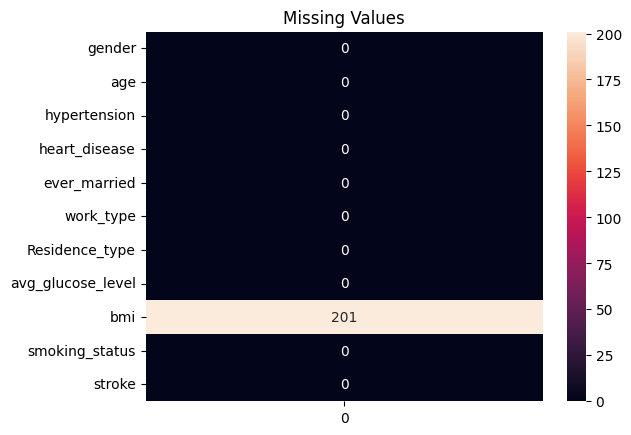

In [68]:
#Missing Values in heatmap
plt.title('Missing Values')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d')

plt.show()

## DATA1

In [69]:
#Fillin missing values with zero
data1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
data1['bmi'] = data1['bmi'].fillna(0)

data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## DATA2

In [70]:
#Fillin missing values with mean value of bmi
data2 = pd.read_csv('healthcare-dataset-stroke-data.csv')

mean_value = data2['bmi'].mean()
data2['bmi'].fillna(value=mean_value,inplace=True)

data2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## DATA3

In [71]:
#Fillin missing values with Linear Regression

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
#Create test_data which contains the 201 rows with bmi = NaN 
test_data = data[data['bmi'].isna()]
test_data.gender =  test_data.gender.replace({'Male':0,'Female':1, 'Other':-1})
test_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,1,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,0,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,0,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,0,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,0,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,0,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,1,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,0,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [72]:
#drop NaN values from data
data.dropna(inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [73]:
# Create X_train and set gender 0 and 1 values
X_train = data.loc[:,('gender', 'age')]
X_train.gender = X_train.gender.replace({'Male':0,'Female':1,'Other':-1})
X_train

,gender,age
0,0,67.0
2,0,80.0
3,1,49.0
4,1,79.0
5,0,81.0
...,...,...
5104,1,13.0
5106,1,81.0
5107,1,35.0
5108,0,51.0


In [74]:
#Create y_train = target variable
y_train = data['bmi']
y_train

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [75]:
#Linear Regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [76]:
#fit the data for model
lr.fit(X_train, y_train)

LinearRegression()

In [77]:
#Create X_test from test_data
X_test = test_data[['gender','age']]
X_test

,gender,age
1,1,61.0
8,1,59.0
13,0,78.0
19,0,57.0
27,0,58.0
...,...,...
5039,0,41.0
5048,0,40.0
5093,1,45.0
5099,0,40.0


In [78]:
#Predictions for bmi values
y_pred = lr.predict(X_test)
y_pred

array([31.10296718, 30.87112977, 32.81121619, 30.37692335, 30.49284206,
       30.60876077, 31.3348046 , 32.72582907, 32.84174778, 32.81121619,
       31.3348046 , 32.81121619, 32.46346007, 32.84174778, 29.94378012,
       31.68256072, 30.49284206, 30.49284206, 32.84174778, 32.37807296,
       32.81121619, 32.72582907, 28.43683693, 31.30427301, 33.1895039 ,
       32.84174778, 31.99978525, 24.18493878, 32.9271349 , 31.1883543 ,
       33.1895039 , 33.07358519, 33.30542261, 32.95766649, 30.84059818,
       32.9271349 , 32.34754137, 32.84174778, 32.34754137, 31.99978525,
       27.7107931 , 32.84174778, 31.3348046 , 30.84059818, 30.02916723,
       28.40630534, 29.596024  , 30.84059818, 27.36303698, 29.01643047,
       25.07519444, 29.79732982, 32.95766649, 26.0025441 , 32.26215425,
       28.08908081, 26.69805634, 28.40630534, 26.69805634, 32.26215425,
       25.27650027, 32.23162266, 24.37968221, 29.68141111, 27.82671181,
       32.49399166, 24.72743832, 29.10181758, 32.26215425, 30.29

In [79]:
#Filling test_data with the predicting values for bmi 
test_data['bmi'] = y_pred

In [80]:
test_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,31.102967,never smoked,1
8,27419,1,59.0,0,0,Yes,Private,Rural,76.15,30.871130,Unknown,1
13,8213,0,78.0,0,1,Yes,Private,Urban,219.84,32.811216,Unknown,1
19,25226,0,57.0,0,1,No,Govt_job,Urban,217.08,30.376923,Unknown,1
27,61843,0,58.0,0,0,Yes,Private,Rural,189.84,30.492842,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,0,41.0,0,0,No,Private,Rural,70.15,28.522224,formerly smoked,0
5048,28788,0,40.0,0,0,Yes,Private,Urban,191.15,28.406305,smokes,0
5093,32235,1,45.0,1,0,Yes,Govt_job,Rural,95.02,29.248268,smokes,0
5099,7293,0,40.0,0,0,Yes,Private,Rural,83.94,28.406305,smokes,0


In [81]:
#Create data3/ the NaN values of bmi filled with LinearRegression
data3 = pd.read_csv('healthcare-dataset-stroke-data.csv')
data3['bmi'] = data3['bmi'].fillna(test_data['bmi'])

data3

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.102967,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,33.305423,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Random Forest in DATA3

In [82]:
#Replace categorical values with numbers
data3.gender = data3.gender.replace({'Male':0,'Female':1,'Other':-1})
data3.ever_married = data3.ever_married.replace({'Yes':0,'No':1})
data3.Residence_type = data3.Residence_type.replace({'Urban':0, 'Rural':1})
data3.smoking_status = data3.smoking_status.replace({'formerly smoked':2,'never smoked':1, 'smokes':0, 'Unknown':-1})
data3.work_type = data3.work_type.replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2})


In [83]:
#Split the dataset in train and test set
from sklearn.model_selection import train_test_split

y = data3['stroke'].values.reshape(-1,1)
X = data3.drop(['stroke'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [84]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier()

<function matplotlib.pyplot.show(close=None, block=None)>

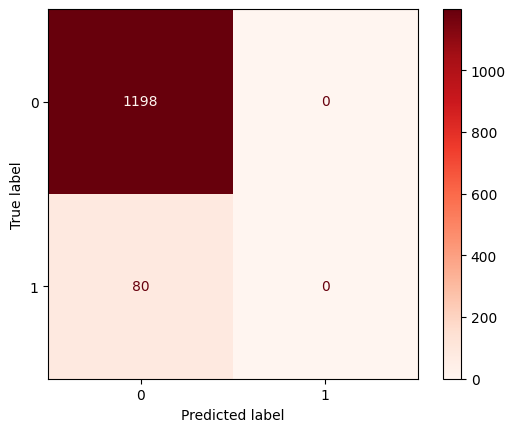

In [85]:
#Plot confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Reds)
plt.grid(False)
plt.show

In [86]:
#Print precision, recall, f1, accuracy of the model
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



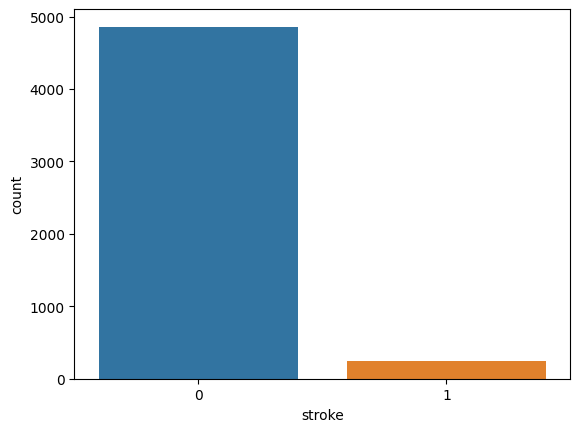

In [87]:
#Check for imbalance dataset in the target feature
x = data3['stroke']
ax = sns.countplot(x=x, data=data)
#Need to resampling

## Upsampling Dataset

(4861, 12)
0    4861
1    4861
Name: stroke, dtype: int64


<AxesSubplot:ylabel='Type'>

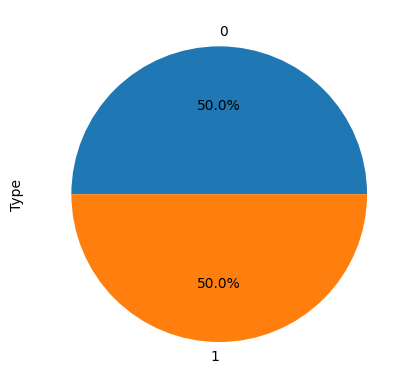

In [88]:
#Upsampling data3
from sklearn.utils import resample

healthy = data3[data3["stroke"] == 0]
patient  = data3[data3["stroke"] == 1]

stroke_upsample = resample(patient,
             replace=True,
             n_samples=len(healthy),
             random_state=42)

print(stroke_upsample.shape)

data_upsampled = pd.concat([healthy, stroke_upsample])

print(data_upsampled["stroke"].value_counts())

data_upsampled.groupby('stroke').size().plot(kind='pie',
                                       y = "stroke",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [89]:
#Show upsampled dataset
data_upsampled

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,0,3.0,0,0,1,-1,1,95.12,18.000000,-1,0
250,30468,0,58.0,1,0,0,0,0,87.96,39.200000,1,0
251,16523,1,8.0,0,0,1,0,0,110.89,17.600000,-1,0
252,56543,1,70.0,0,0,0,0,1,69.04,35.900000,2,0
253,46136,0,14.0,0,0,1,-2,1,161.28,19.100000,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
178,33486,1,80.0,0,0,0,2,0,110.66,33.305423,-1,1
174,40899,1,78.0,0,0,0,1,1,60.67,33.073585,2,1
238,1836,1,51.0,1,0,0,0,0,88.20,28.400000,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.400000,0,1


In [90]:
#Split in train and test
y = data_upsampled['stroke'].values.reshape(-1,1)
X = data_upsampled.drop(['stroke'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
#Random Forest for upsampled dataset
rf = RandomForestClassifier(100)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier()

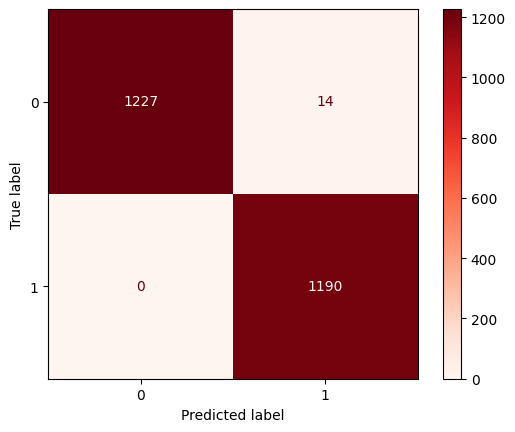

In [92]:
#Plot confusion matrix
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Reds)
plt.grid(False)
plt.show()

In [93]:
#Print precision, recall, f1, accuracy of the model
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1241
           1       0.99      1.00      0.99      1190

    accuracy                           0.99      2431
   macro avg       0.99      0.99      0.99      2431
weighted avg       0.99      0.99      0.99      2431



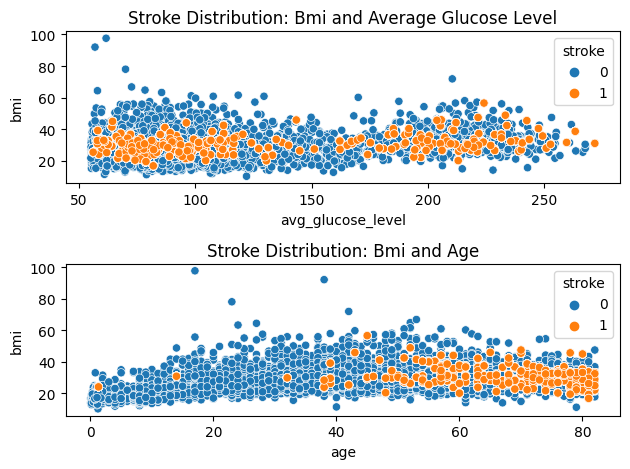

In [94]:
#Plot -> Stroke Distribution: Bmi and Average Glucose Level
plt.subplot(2,1,1)
plt.title('Stroke Distribution: Bmi and Average Glucose Level')
sns.scatterplot(x=data_upsampled['avg_glucose_level'],y=data_upsampled['bmi'],hue=data_upsampled['stroke'])

#Plot -> Stroke Distribution: Bmi and Age
plt.subplot(2,1,2)
plt.title('Stroke Distribution: Bmi and Age')
sns.scatterplot(x=data_upsampled['age'],y=data_upsampled['bmi'],hue=data_upsampled['stroke'])
plt.tight_layout()
plt.show()